--- 
# Box Office Intelligence: Data-Driven Strategy for a New Movie Studio
---



## Project Purpose
In an era where major media and tech companies are investing heavily in original content, our company aims to enter the movie industry by launching a new film studio. However, lacking prior experience in film production, we must rely on data to guide our decisions.

This project provides our new studio with actionable, data-driven insights into what makes films successful. By analyzing financial performance, critical reception, and audience response, we identify key factors that influence box office outcomes — helping the studio choose the right genres, budget levels, and release strategies.

---

## Core Objectives
1. **Identify** the most profitable film genres and their optimal budget ranges  
2. **Determine** the relationship between critical/audience reception and financial success  
3. **Analyze** seasonal trends in box office performance  
4. **Develop** actionable recommendations for film production and release strategy

---

## Data Foundation
We integrate six key datasets to ensure comprehensive, multi-dimensional insights:

- **Financial Data**
  - `tn.movie_budget`: Production costs
  - `bom.movie_gross`: Domestic and worldwide gross revenue

- **Audience Metrics**
  - IMDb ratings
  - TMDB popularity scores

- **Critical Reception**
  - `rt.movies`: Critic scores
  - `rt.reviews`: Audience sentiment analysis

---

## Project Structure

1. **Business Understanding**  
   Clarify studio goals, competitive context, and success metrics  

2. **Data Understanding**  
   Explore dataset characteristics, coverage, and potential limitations  

3. **Data Preparation**  
   Clean, merge, and transform datasets into an analyzable form  

4. **Exploratory Analysis & Modeling**  
   Conduct visual/statistical analysis to uncover patterns and trends  

5. **Business Recommendations**  
   Deliver three prioritized, evidence-based strategic proposals  

6. **Conclusion**  
   Summarize key findings and their implications for studio decisions  

7. **Next Steps**  
   Provide an implementation roadmap and ideas for future analysis  

---

## Key Questions We Seek to Answer
- Which genres consistently generate high revenue and ROI?
- How does production budget affect profitability across genres?
- What role do ratings and critic scores play in box office success?

---

## Expected Strategic Value

This analysis enables the studio to make informed, confident decisions in four critical areas:

- **Genre Selection**  
  Choose film types with the greatest potential for both critical and commercial success

- **Budget Allocation**  
  Optimize spending across low-, mid-, and high-budget productions

---

## Next Steps
- Deep dive into specific genres or audience segments  
- Forecast revenue potential for upcoming releases using ML models  
- Build an internal dashboard for ongoing market intelligence  
- Expand to streaming trends and international box office analysis  

---

## 🧠 Author
**Ralph DJino DUMERA**  
Final-year IT Engineering student with a passion for data science and applied analytics in creative industries.

---



# Business Understanding

### 🎬 Industry Context
The entertainment industry has undergone a major shift. With streaming platforms and tech giants investing billions into original content, owning successful film properties has become a critical strategy for media growth and audience engagement. Our company now aims to join this competitive landscape by launching its own movie studio.

However, creating successful films is both capital-intensive and unpredictable. Without prior experience in film production, the studio must rely on a data-driven approach to make informed creative and business decisions.

---

### 🏆 Business Goal
The goal of this project is to guide the strategic decisions of our new movie studio by answering a central question:

> **What types of films are currently performing best at the box office, and how can we replicate their success?**

This includes identifying:
- Which genres are the most profitable
- The relationship between budget and revenue
- How release timing affects success
- The role of audience and critic reception

---

### 💼 Stakeholders
- **Studio Executives**: Responsible for greenlighting projects and managing investment
- **Marketing & Distribution Teams**: Plan release dates, promotion strategies, and distribution channels
- **Creative Teams**: Writers, directors, and producers deciding what kinds of stories to tell

---

### 📈 Success Criteria
A successful analysis will:
- Uncover clear, statistically backed insights about film performance
- Provide **three actionable recommendations** for the studio’s first film projects
- Be easy to communicate to non-technical stakeholders via visuals and summaries
- Lead to decisions that increase the chances of financial and critical success

---

### ❗Business Constraints
- Limited initial budget for production
- Need to show results within a short development cycle (1–2 films in the first year)
- High competition from established studios and franchises

---

### 🧩 Alignment with Broader Strategy
This initiative supports the company’s long-term goals of:
- Diversifying its revenue streams through original content
- Building brand value in the entertainment space
- Owning intellectual property for future streaming, merchandising, and licensing

---



# Data Understanding
---
## 📚 Dataset Inventory

We analyze six core datasets to build a comprehensive view of film performance. These datasets offer a blend of financial data, audience insights, and critical evaluations — allowing us to answer key business questions from multiple perspectives.

| Dataset          | Key Variables                            | Relevance                     | Source             |
|------------------|-------------------------------------------|-------------------------------|--------------------|
| `bom.movie_gross` | Domestic/foreign gross, studio            | Financial performance         | Box Office Mojo    |
| `tn.movie_budgets` | Production budget, worldwide/domestic gross | ROI calculation               | The Numbers         |
| `im.db`          | Genres, runtime, start year              | Content characteristics       | IMDb               |
| `tmdb.movies`    | Popularity, vote averages, genres         | Audience reception            | TMDb               |
| `rt.movies`      | Critic scores, freshness rating           | Critical reception            | Rotten Tomatoes    |
| `rt.reviews`     | Review content, freshness (binary label)  | Text-based sentiment analysis | Rotten Tomatoes    |

---

## 🔎 Initial Exploration

Before diving into analysis, we begin with a preliminary review of each dataset to assess structure, completeness, and relevance. Specifically, we aim to:

- Understand the shape and schema of each dataset
- Identify key variables we will use in merging and modeling
- Check for missing values, duplicates, or inconsistent formatting
- Note any early red flags that may require cleaning or transformation

Each dataset will be reviewed individually, followed by an assessment of how they interrelate — especially through common fields like `title`, `release_year`, or `genre`.

---



In [39]:
# We're starting by importing all the necessary libraries for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import sqlite3 as sql
import numpy as np

## Initial Data Loading

We'll start by loading our primary datasets to examine their structure and contents. The first dataset we explore is from **IMDb**, which contains:

- Core movie metadata (titles, release years, genres)
- Rating information (average rating, number of votes)
- Runtime and other technical details

This forms our foundation for understanding film characteristics that may correlate with commercial success. Subsequent cells will load and examine the remaining datasets.

In [40]:
# DATA UNDERSTANDING: INITIAL DATA LOADING

# We begin by loading and exploring our primary datasets to understand:
# 1. Data availability and structure
# 2. Initial quality assessment
# 3. Potential relationships between datasets

# List of all data files with their formats
db_files = [
    "im.db\\im.db\\im.db",                   # SQLite database (IMDb)
    "bom.movie_gross.csv.gz",         # Box Office Mojo data (CSV)
    "rt.movie_info.tsv.gz",           # Rotten Tomatoes metadata (TSV)
    "rt.reviews.tsv.gz",              # Rotten Tomatoes reviews (TSV)
    "tmdb.movies.csv.gz",             # TMDB movie data (CSV)
    "tn.movie_budgets.csv.gz"         # The Numbers budget data (CSV)
]

![IMDb Data ERD](./image/movie_data_erd.jpeg)

### Understanding the IMDb Schema

The Entity Relationship Diagram (ERD) above outlines the structure of the IMDb dataset. For our analysis, we focus on two key tables:

- **`movie_basics`**: Contains core metadata such as movie titles, genres, release years, and runtimes.
- **`movie_ratings`**: Includes user ratings and the number of votes per title.

These tables provide essential context about a film’s content characteristics and audience reception, both of which are critical for evaluating performance trends.


In [41]:
# =============================================
# IMDB DATA LOADING
# =============================================

# Establish connection to IMDb SQLite database
conn = sql.connect(f"./data/{db_files[0]}")

# SQL query to join movie basics with their ratings
query_1 = """ 
    SELECT * FROM movie_basics
        JOIN movie_ratings
            USING(movie_id)
    ;
"""

# Execute query and load results into DataFrame
imdb_df = pd.read_sql(query_1, conn)

# Display dataset structure
print("IMDb Dataset Structure:")


# Close database connection
conn.close()
imdb_df.head()

IMDb Dataset Structure:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### IMDb Dataset Overview

The IMDb dataset contains metadata and audience feedback for **73,856 movies** across 8 columns. Here's a summary of its structure and data quality:

#### Summary
| Column Name        | Description                                 | Notes                                |
|--------------------|---------------------------------------------|--------------------------------------|
| `movie_id`         | Unique movie identifier                     | Fully populated (73,856 non-null)    |
| `primary_title`    | Title used for display                      | No missing values                    |
| `original_title`   | Original release title                      | Same as above                        |
| `start_year`       | Year of release                             | Complete, useful for time trends     |
| `runtime_minutes`  | Film duration in minutes                    | ~10% missing, may require imputation |
| `genres`           | Pipe-separated genre tags (e.g., Action|Drama) | ~1% missing                          |
| `averagerating`    | IMDb user rating (0–10)                     | Fully populated                      |
| `numvotes`         | Total number of votes received              | Fully populated                      |

#### Key Observations
- `runtime_minutes` is missing for ~7,620 movies. Depending on use, we may:
  - Impute with median/genre average
  - Drop rows if this column isn't critical
- `genres` is missing for 804 entries (~1%) — low enough to drop or label as `"Unknown"`
- All other fields are complete and ready for analysis

This dataset is highly valuable for:
- Understanding audience preferences (`averagerating`, `numvotes`)
- Analyzing genre performance
- Tracking trends over time using `start_year`
- Filtering by runtime for pacing or audience targeting
---


In [42]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


### Dataset: `bom.movie_gross` (Box Office Mojo)

This dataset contains box office performance data, including domestic gross, studio affiliation, and release year. It’s essential for evaluating a film's commercial success and understanding which studios and release periods perform best.

We begin by loading and previewing the dataset:


In [43]:
bom_path = f"./data/{db_files[1]}"
bom_df = pd.read_csv(bom_path)
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Box Office Mojo Dataset Overview (`bom.movie_gross`)

This dataset contains box office performance information for **3,387 films**, with financial data and studio affiliations. It provides insights into **domestic and foreign earnings**, making it critical for analyzing market performance by region and across time.

#### Summary
| Column Name       | Description                         | Notes                                         |
|-------------------|-------------------------------------|-----------------------------------------------|
| `title`           | Film title                          | Fully populated (3,387 entries)               |
| `studio`          | Producing/distributing studio       | 5 missing entries — can be labeled as `Unknown` if needed |
| `domestic_gross`  | U.S. box office revenue (in USD)    | 28 missing — may require filtering or imputation |
| `foreign_gross`   | International revenue (in USD)      | Over 1,300 missing values (~40%)              |
| `year`            | Year of release                     | Complete and useful for time-series analysis  |

#### Key Observations
- `foreign_gross` is missing in ~40% of the entries. We may:
  - Focus on `domestic_gross` where foreign data is unavailable
  - Use this field cautiously when calculating worldwide totals
- `domestic_gross` is mostly complete, with only minor gaps
- `studio` is missing for 5 entries — could be cleaned or labeled `"Unknown"`

Before performing financial calculations (e.g., total gross, ROI), we’ll need to:
- Convert `foreign_gross` from `object` to numeric (it's likely formatted with `$` or commas)
- Decide how to handle missing revenue fields (drop or impute)

This dataset will be central to evaluating commercial performance, release year trends, and studio impact.


In [44]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Dataset: `rt.movies` (Rotten Tomatoes Movie Info)

This dataset contains key metadata from Rotten Tomatoes, including critic scores, audience scores, and film "freshness" ratings. These metrics are central to understanding how critical reception aligns with box office performance and which types of films are more favorably reviewed.

We load the dataset and display the first few rows:


In [45]:
rt_movie_path = f"./data/{db_files[2]}"
rt_movie_df = pd.read_csv(rt_movie_path, sep='\t')
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Rotten Tomatoes Movie Info Dataset Overview (`rt.movies`)

This dataset contains film metadata and performance indicators collected from Rotten Tomatoes. With **1,560 entries** across 12 columns, it includes fields such as genre, director, critic ratings, runtime, box office revenue, and release dates — all valuable for evaluating **critical reception** and **theatrical performance**.

#### Summary
| Column Name     | Description                             | Notes                                                       |
|------------------|-----------------------------------------|-------------------------------------------------------------|
| `id`             | Unique film ID                          | Fully populated                                             |
| `synopsis`       | Brief plot summary                      | ~4% missing — not used in numeric analysis                  |
| `rating`         | MPAA rating (e.g., PG-13, R)            | 3 missing entries                                           |
| `genre`          | Main genre(s)                           | 8 missing entries                                           |
| `director`       | Primary director                        | ~13% missing — optional for correlation later               |
| `writer`         | Screenwriter(s)                         | ~29% missing                                                |
| `theater_date`   | Initial theatrical release date         | ~23% missing                                                |
| `dvd_date`       | DVD release date                        | Same as above                                               |
| `currency`       | Currency type for box office values     | Only 340 entries populated                                 |
| `box_office`     | Total box office revenue (string format)| Matches `currency` availability; needs parsing              |
| `runtime`        | Duration in minutes (as string)         | Mostly complete (2% missing) — needs conversion             |
| `studio`         | Producing or distributing studio        | Sparsely populated (~68% missing)                           |

#### 🔎 Key Observations
- `box_office` and `currency` are only populated for 340 films — suitable for partial revenue analysis or comparison with external datasets.
- `runtime` is formatted as a string (e.g., "1 hr 50 min") and needs to be converted to numeric (in minutes).
- `theater_date` and `dvd_date` can support release trend analysis but have some gaps.
- `studio`, `writer`, and `director` are useful but incomplete; can be leveraged selectively for talent-related insights.

Despite missing data in some fields, this dataset remains valuable for:
- Understanding content characteristics (e.g., rating, genre, runtime)
- Linking critical metadata (e.g., director/studio) with performance
- Performing targeted box office analysis (for rows with `box_office` values)

We'll apply parsing and cleaning strategies to make fields like `runtime` and `box_office` analysis-ready.


In [46]:
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Dataset: `rt.reviews` (Rotten Tomatoes Audience & Critic Reviews)

This dataset includes individual review text and corresponding "fresh" or "rotten" labels from Rotten Tomatoes. It’s useful for performing sentiment analysis and for gaining a deeper understanding of audience and critic responses at the textual level.

We load the dataset and preview the first few rows:


In [47]:
rt_reviews_path = f"./data/{db_files[3]}"
rt_reviews_df = pd.read_csv(rt_reviews_path, sep='\t', encoding='windows-1252')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### Rotten Tomatoes Reviews Dataset (`rt.reviews`)

This dataset includes **54,432 critic reviews** of various films, sourced from Rotten Tomatoes. It is particularly useful for understanding **sentiment**, **critical consensus**, and evaluating the **distribution of positive (“fresh”) vs. negative (“rotten”)** reviews.

#### Summary
| Column Name   | Description                                         | Notes                                                |
|---------------|-----------------------------------------------------|------------------------------------------------------|
| `id`          | Film identifier (matches `rt.movies`)              | Fully populated — used for merging with metadata     |
| `review`      | Text of the review                                  | ~10% missing — could impact sentiment analysis       |
| `rating`      | Qualitative rating (e.g., 3/5, B+)                  | ~25% missing — optional if doing score calibration   |
| `fresh`       | Binary label: `"fresh"` or `"rotten"`              | Fully populated — ideal for sentiment classification |
| `critic`      | Name of the critic                                  | ~5% missing                                          |
| `top_critic`  | Boolean (1 = top critic, 0 = not)                   | Fully populated — helps filter authoritative voices  |
| `publisher`   | Media outlet                                        | Almost complete (99.4%)                              |
| `date`        | Review publication date (string)                   | Fully populated — good for time-based analysis       |

#### 🔎 Key Observations
- The `fresh` column provides a direct sentiment signal — usable for binary classification or aggregation.
- The `rating` field is valuable for granular scoring but inconsistent (text-based, e.g., "3/5", "B+"), so parsing is required.
- `top_critic` and `publisher` can help segment influential vs. general reviewers.
- With ~90% of reviews having complete text, this dataset supports robust **text mining**, **NLP modeling**, or **time series trends** in reception.

We’ll likely use this dataset in conjunction with `rt.movies` to:
- Analyze how critic sentiment aligns with box office success.
- Study genre-specific sentiment patterns.
- Possibly develop a review-based score or freshness index per film.


In [48]:
rt_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Dataset: `tmdb.movies` (The Movie Database)

This dataset provides audience-driven metrics such as popularity scores, vote counts, and average ratings, as well as genre tags and release dates. TMDb data complements IMDb by offering a broader view of user engagement and perceived popularity across a diverse audience.

We now load the dataset and take a quick look at its contents:


In [49]:
tmdb_path = f"./data/{db_files[4]}"
tmdb_df = pd.read_csv(tmdb_path)
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### TMDB Movies Dataset (`tmdb.movies`)

This dataset contains **26,517 movies** from The Movie Database (TMDB), offering valuable metadata about film **popularity**, **genre**, **audience ratings**, and **release information**.

#### Summary
| Column Name         | Description                                         | Notes                                               |
|---------------------|-----------------------------------------------------|-----------------------------------------------------|
| `id`                | Unique movie identifier                            | Useful for merging with external metadata           |
| `title`             | English title of the movie                         | Fully populated                                     |
| `original_title`    | Original title (non-translated)                    | Helps with multi-language mapping                   |
| `original_language` | Language code (e.g., "en", "fr")                   | Key for multilingual trends                         |
| `genre_ids`         | List of numeric genre codes                        | Requires mapping to actual genre names              |
| `popularity`        | TMDB popularity score (float)                      | Relative metric — good for ranking films            |
| `release_date`      | Date of theatrical release                         | Fully populated — valuable for temporal analysis    |
| `vote_average`      | Average user rating (0–10)                         | Direct indicator of audience reception              |
| `vote_count`        | Number of votes submitted                          | Used to weigh the reliability of `vote_average`     |
| `Unnamed: 0`        | Index column (redundant)                           | Can be safely dropped                               |

#### 🔎 Key Observations
- The `vote_average` + `vote_count` pairing enables us to compute a **weighted audience score**.
- `genre_ids` must be mapped to human-readable genre names using a reference mapping.
- The `popularity` metric is platform-specific (not financial), but still useful to rank or filter.
- This dataset complements IMDB ratings with **crowdsourced** popularity and language-based insights.

We’ll likely use this dataset to:
- Compare critical vs. audience reception.
- Study rating trends by genre or release period.
- Estimate the correlation between popularity and revenue.


In [50]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Dataset: `tn.movie_budgets` (Production Budgets & Revenue)

This dataset from The Numbers provides detailed financial information for films, including production budgets, domestic and worldwide gross. It enables calculation of return on investment (ROI) and is critical for analyzing the financial viability of different types of films.

We load and inspect the dataset below:


In [51]:
tn_path = f"./data/{db_files[5]}"
tn_df = pd.read_csv(tn_path)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### The Numbers – Movie Budgets Dataset (`tn.movies`)

This dataset from *The Numbers* provides financial insights for **5,782 films**, including **budget**, **domestic**, and **worldwide grosses**.

#### Summary
| Column Name         | Description                             | Notes                                             |
|---------------------|-----------------------------------------|---------------------------------------------------|
| `id`                | Unique identifier                       | Can be used for indexing or joining               |
| `release_date`      | Official release date                   | Fully populated; enables temporal revenue trends   |
| `movie`             | Movie title                             | Mostly clean; may require alignment with other sources |
| `production_budget` | Budget allocated to produce the film    | String format (with `$`, `,`) — needs cleaning     |
| `domestic_gross`    | Revenue from US/Canada                  | Also needs cleaning; some missing or zero values  |
| `worldwide_gross`   | Total global revenue                    | May include domestic; varies by source definition |

#### Key Observations
- All budget and revenue columns are **stored as strings** (e.g., "$50,000,000") and must be **converted to numeric** types for analysis.
- The `release_date` field enables us to analyze financial trends across time or compare films by release windows.
- This dataset is crucial for calculating:
  - **ROI** (Return on Investment)
  - **Profitability analysis**
  - Comparisons between critical success and financial success

We’ll use this data to:
- Understand which types of films (genre, year, studio) generate high returns.
- Compare budget against worldwide box office performance.
- Merge with ratings data to explore quality vs. commercial performance.


In [52]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

Before performing any meaningful analysis, we must ensure our datasets are clean, consistent, and ready for merging. This phase focuses on resolving data quality issues such as missing values, inconsistent formats, and variable types. We also transform variables where necessary and engineer key features to support our analysis, such as extracting release years, converting currency-formatted strings to numeric values, and computing return on investment (ROI). The ultimate goal is to create a unified and analyzable dataset that captures the financial, critical, and audience-related aspects of film performance.

---

### Handling missing values
Before conducting any meaningful analysis, it is essential to address missing values in the datasets to ensure data integrity and avoid biased results. Missing data can arise from various sources such as incomplete records, inconsistent formatting, or unavailable information.

In this section, we applied appropriate strategies to handle null values based on the context of each column. For example, numerical fields like movie runtime were imputed using the median, while irrelevant rows or columns with excessive missingness were removed. 

This preprocessing step ensures a cleaner dataset and improves the reliability of downstream analysis.

In [53]:
imdb_df.isnull().sum()
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [54]:
bom_df.isnull().sum()
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [55]:
# Fill missing runtime values in imdb_df with the median runtime
run_time_median = float(imdb_df["runtime_minutes"].median())
imdb_df["runtime_minutes"] = imdb_df["runtime_minutes"].fillna(run_time_median)

# Convert all genre names to lowercase for consistency
imdb_df["genres"] = imdb_df["genres"].str.lower()

# Rename the 'primary_title' column to simply 'title'
imdb_df.rename(columns={"primary_title": "title"}, inplace=True)

# Convert all titles to lowercase to standardize for merging/joining
imdb_df["title"] = imdb_df["title"].str.lower()

# Drop any remaining rows with missing values in imdb_df
imdb_df = imdb_df.dropna()

# Replace missing values in 'foreign_gross' with 0 in bom_df
bom_df["foreign_gross"] = bom_df["foreign_gross"].fillna(0)

# Remove commas and convert 'foreign_gross' to float
bom_df["foreign_gross"] = bom_df["foreign_gross"].apply(lambda x: float(str(x).replace(",", "")))

# Standardize title formatting in bom_df to lowercase
bom_df["title"] = bom_df["title"].str.lower()

# Convert movie titles to lowercase and rename 'movie' column to 'title' in tn_df
tn_df["movie"] = tn_df["movie"].str.lower()
tn_df.rename(columns={"movie": "title"}, inplace=True)

# Extract the release year from the 'release_date' column and convert to int
tn_df["year"] = tn_df["release_date"].str.split(",").apply(lambda x: int(x[-1]))

# Clean and convert currency-formatted strings to floats for budget and revenue fields
tn_df["production_budget"] = tn_df["production_budget"].apply(lambda x: float(str(x.replace("$", "")).replace(",", "")))
tn_df["domestic_gross"] = tn_df["domestic_gross"].apply(lambda x: float(str(x.replace("$", "")).replace(",", "")))
tn_df["worldwide_gross"] = tn_df["worldwide_gross"].apply(lambda x: float(str(x.replace("$", "")).replace(",", "")))

# Drop the original 'release_date' column as it's no longer needed
tn_df.drop("release_date", axis=1, inplace=True)

# Remove any remaining rows with missing data in bom_df
bom_df = bom_df.dropna()


Text(0, 0.5, 'Frequency')

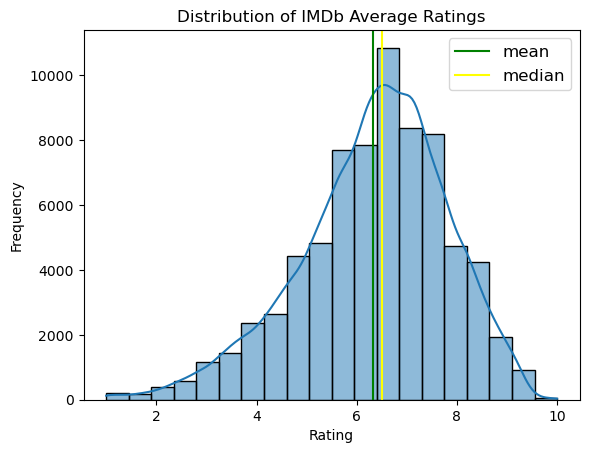

In [56]:
# Distribution of average ratings
sns.histplot(imdb_df['averagerating'], bins=20, kde=True)
plt.title("Distribution of IMDb Average Ratings")
plt.axvline(imdb_df['averagerating'].mean(), label="mean", color="green")
plt.axvline(imdb_df['averagerating'].median(), label="median", color="yellow")
plt.legend(fontsize = 12)
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Analysis and Results

In this section, we analyze the movie datasets from various sources—including IMDb, Rotten Tomatoes, TMDB, Box Office Mojo, and The Numbers—to uncover trends and insights relevant to box office performance and audience reception. Our goal is to identify key patterns in genres, release strategies, ratings, budgets, and revenue, and to determine which factors are most strongly associated with commercial and critical success.

We begin by exploring the distribution of key variables such as ratings, vote counts, runtime, and gross revenues. We then perform correlation analyses and visual comparisons across datasets to better understand how different attributes influence a movie’s performance. Finally, we summarize our findings with visualizations and interpret the results to support decision-making for future film production and marketing strategies.


### IMDb Top-Rated and Most-Voted Movies

We begin our analysis with the IMDb dataset by focusing on movies that received the highest number of user votes and the highest average ratings. This allows us to identify titles that not only reached a wide audience but also resonated positively with viewers.

By analyzing this subset, we can understand what types of movies tend to perform well in terms of both popularity and satisfaction—providing a strong reference point for comparison with other data sources such as TMDB, Rotten Tomatoes, and box office results.

---

### Selection of Notable IMDb Movies

To focus our analysis on impactful titles, we filtered the IMDb dataset to include only movies that meet two key criteria:

- Received **more than 100,000 votes**, indicating widespread audience reach.
- Achieved an **average rating above 6.5**, signaling generally positive reception.

This subset represents a collection of well-known and well-regarded movies that can serve as a reference point for evaluating trends in genre, runtime, and commercial success.



In [57]:
# Calculate the mean and median number of votes in the IMDb dataset
mean_num = int(imdb_df["numvotes"].mean())
median_num = int(imdb_df["numvotes"].median())

# Calculate the median of the average rating column
rating_median = imdb_df['averagerating'].median()

# Set a threshold for filtering: only consider movies with at least 100,000 votes
min_numvotes = 100000

# Filter the dataset to include only movies with:
# - at least 100,000 votes
# - average rating equal to or above the median rating
imdb = imdb_df.query(f"numvotes >= {min_numvotes} & averagerating >= {rating_median}")

# Sort the filtered dataset by number of votes in descending order
imdb = imdb.sort_values(by="numvotes", ascending=False)

# Print the shape (number of rows and columns) of the resulting DataFrame
print(f"Result : {imdb.shape}")

# Extract the top 10 most-voted, highly-rated movies
top_ten_movies = imdb.head(10)

# Display the top 10 movies
top_ten_movies


Result : (457, 8)


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,inception,Inception,2010,148.0,"action,adventure,sci-fi",8.8,1841066
2241,tt1345836,the dark knight rises,The Dark Knight Rises,2012,164.0,"action,thriller",8.4,1387769
280,tt0816692,interstellar,Interstellar,2014,169.0,"adventure,drama,sci-fi",8.6,1299334
12072,tt1853728,django unchained,Django Unchained,2012,165.0,"drama,western",8.4,1211405
325,tt0848228,the avengers,The Avengers,2012,143.0,"action,adventure,sci-fi",8.1,1183655
507,tt0993846,the wolf of wall street,The Wolf of Wall Street,2013,180.0,"biography,crime,drama",8.2,1035358
1091,tt1130884,shutter island,Shutter Island,2010,138.0,"mystery,thriller",8.1,1005960
15327,tt2015381,guardians of the galaxy,Guardians of the Galaxy,2014,121.0,"action,adventure,comedy",8.1,948394
2831,tt1431045,deadpool,Deadpool,2016,108.0,"action,adventure,comedy",8.0,820847
2523,tt1392170,the hunger games,The Hunger Games,2012,142.0,"action,adventure,sci-fi",7.2,795227


## Analysis by Genre

To better understand the types of movies that resonate most with audiences, we explore how different genres perform in terms of popularity and engagement. Since many films belong to multiple genres, we split genre combinations into individual categories, allowing us to assess genre-specific trends more accurately.

In this section, we will:
- Plot the **number of votes by genre** to observe audience engagement.
- Plot the **average rating by genre** to understand perceived quality.

This analysis helps identify which genres are both widely viewed and well-regarded, offering valuable insights into audience preferences.


---

In [58]:
# Split the comma-separated genre strings into lists so that each movie can have multiple genres
imdb["genres"] = imdb["genres"].str.split(",")

# Transform the dataframe so that each genre appears in its own row (explode the list into separate rows)
imdb_exploded = imdb.explode("genres")

# Group by genre and calculate the average number of votes per genre
# Sort the result in descending order of average number of votes
genre_numvotes = imdb_exploded.groupby("genres")["numvotes"].mean().sort_values(ascending=False).reset_index()

# Group by genre and calculate the average rating per genre
# Sort the result in descending order of average rating
genre_rating = imdb_exploded.groupby("genres")["averagerating"].mean().sort_values(ascending=False).reset_index()


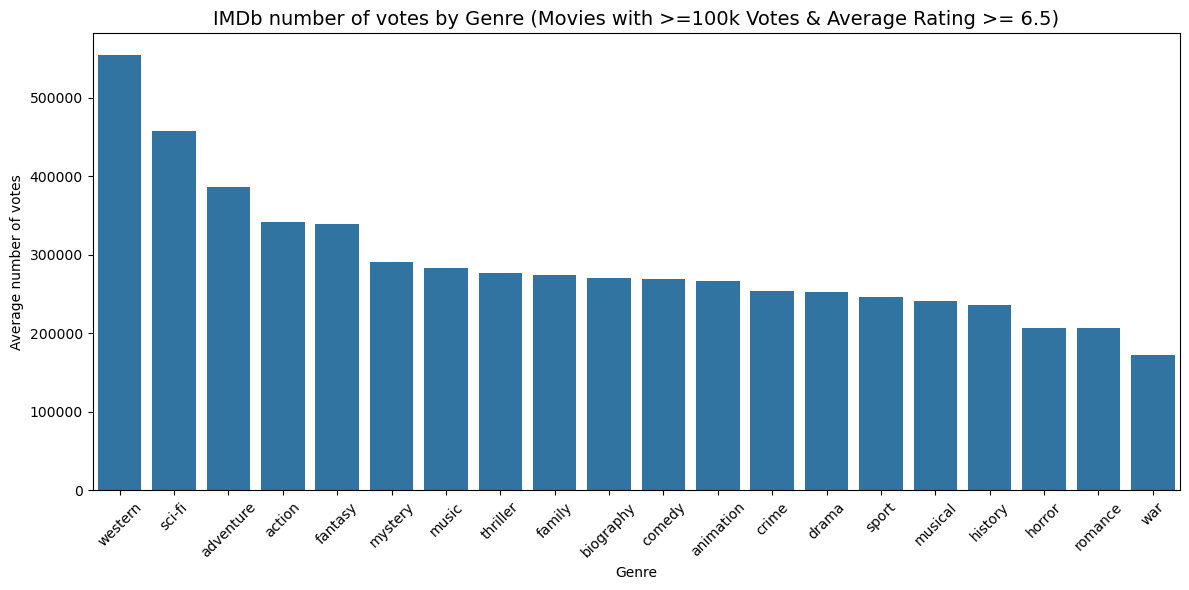

In [59]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_numvotes, x="genres", y="numvotes")
plt.xticks(rotation=45)
plt.title(f"IMDb number of votes by Genre (Movies with >={int(min_numvotes/1000)}k Votes & Average Rating >= {rating_median})", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("Average number of votes")
plt.tight_layout()
plt.show()

### Most Popular Genres by Number of Votes

After filtering for notable movies (those with over 100,000 votes and an average rating above 6.5), we examined the total audience engagement by genre.

The five most popular genres, based on the average number of votes, are:

1. **Western** – 554,651 votes  
2. **Sci-Fi** – 458,185 votes  
3. **Adventure** – 386,414 votes  
4. **Action** – 341,537 votes  
5. **Fantasy** – 338,897 votes  

These genres appear to draw the most attention from viewers, either because of broader audience appeal, more frequent releases, or strong fan communities.


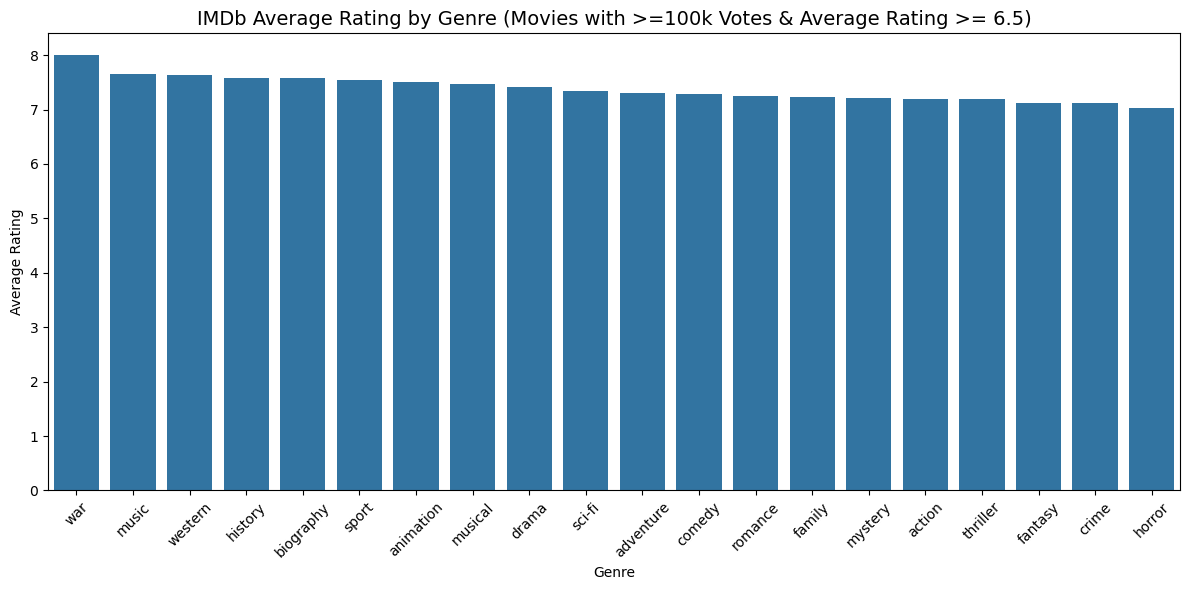

In [60]:

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_rating, x="genres", y="averagerating")

# Add titles and labels
plt.title(f"IMDb Average Rating by Genre (Movies with >={int(min_numvotes/1000)}k Votes & Average Rating >= {rating_median})", fontsize=14)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()

# 6. Show the plot
plt.show()

### Average Ratings by Genre

To understand which genres are most appreciated by audiences, we calculated the **average IMDb rating** for each genre among the 457 notable movies (defined as movies with at least 100,000 votes and an average rating of 6.5 or more).

This ranking shows that while genres like **Action**, **Fantasy**, and **Horror** may be more commercially oriented, genres such as **War**, **Music**, and **Biography** tend to receive higher critical acclaim from audiences on IMDb.

---

### Trend Over Time
#### Number of Notable Movies Released per Year

To better understand the evolution of high-performing movies over time, we analyzed the number of notable IMDb movies released each year. Notable movies are defined here as those with **at least 100,000 votes** and an **average rating greater than 6.5**.


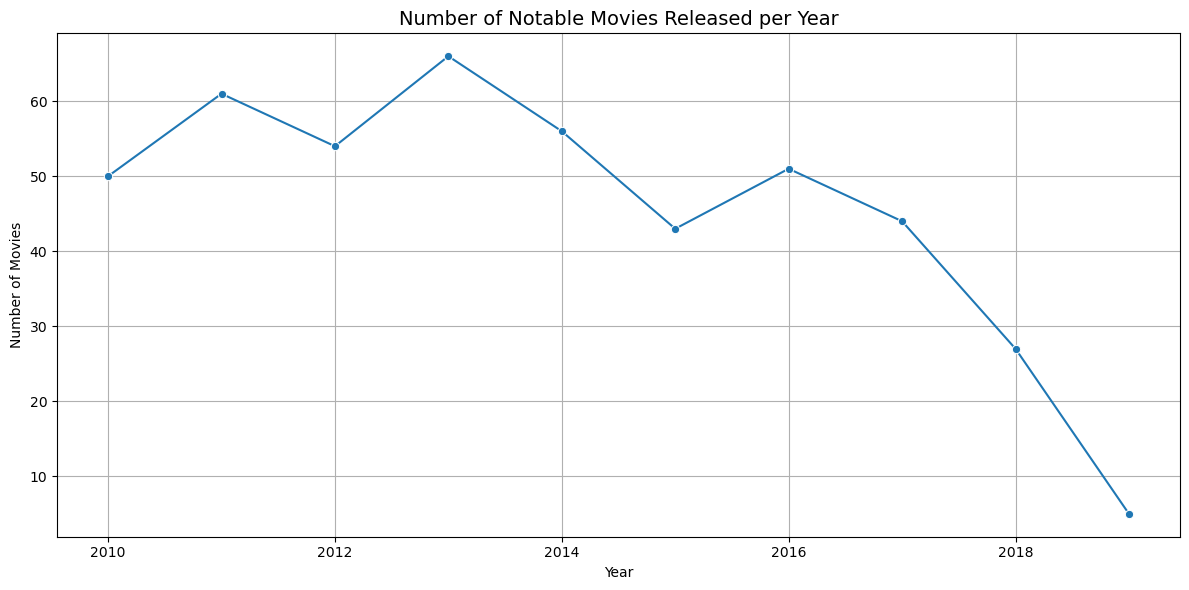

In [61]:
movies_per_year = imdb.groupby(by="start_year").size().reset_index(name='count')
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_per_year, x="start_year", y="count", marker="o")
plt.title("Number of Notable Movies Released per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()


The analysis reveals a **generally declining trend** in the number of such movies over the years. However, there are **three significant peaks** in production:

- **2010–2012**
- **2012–2014**
- **2015–2017**

Following 2016, the number of notable movie releases appears to **drop considerably**. This decrease could be attributed to changes in the film industry, the growing dominance of streaming platforms, or simply a lag in audience engagement for more recent films.

---
### Audience Engagement Over Time (Average Vote Count per Year)

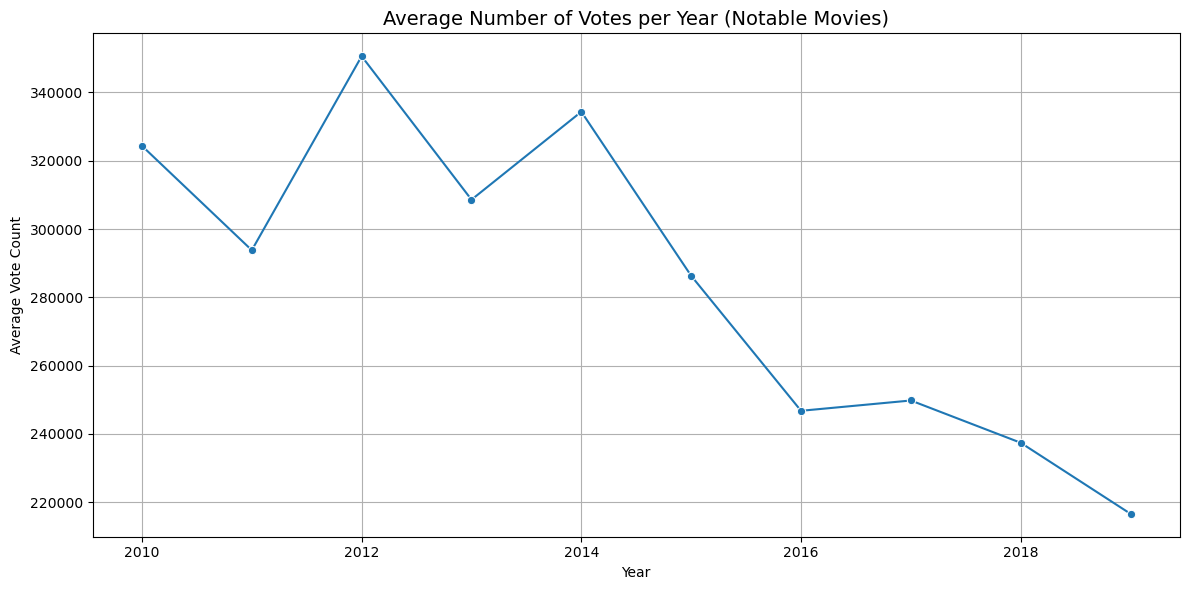

In [62]:
avg_votes_per_year = imdb.groupby(by="start_year")["numvotes"].mean().reset_index()
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_votes_per_year, x='start_year', y='numvotes', marker='o')
plt.title("Average Number of Votes per Year (Notable Movies)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Vote Count")
plt.grid(True)
plt.tight_layout()
plt.show()

The resulting trend highlights:

Two distinct peaks of engagement:

- Between 2011 and 2012

- Again between 2013 and 2015

After 2015, ***a clear and consistent decline*** in average vote counts suggests decreasing audience voting activity or a shift in viewer engagement behavior.

This trend may reflect changes in viewing platforms, voting habits, or the overall volume of widely popular releases.

---

### Most Common Genre Combinations in Top Movies

In this section, we look at the most frequent genre combinations found in the top movies. Instead of separating each genre, we keep them grouped as they appear in the data. This helps us see which types of stories or themes are most popular among successful films. The chart below shows the genre combinations that appear the most.

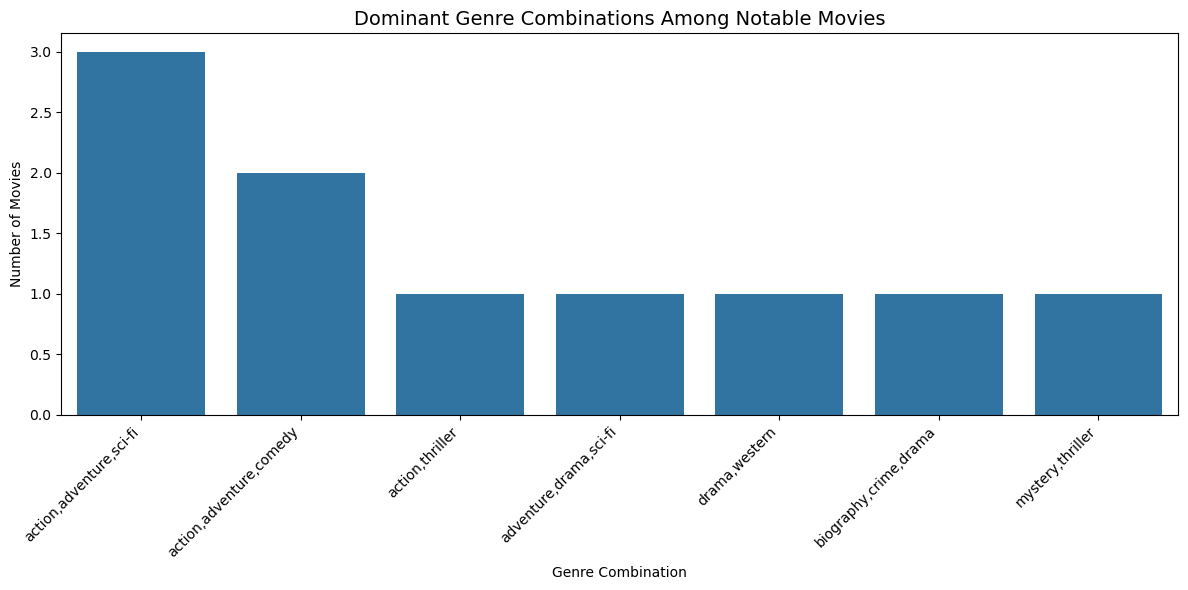

In [63]:
genre_counts = top_ten_movies["genres"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Count"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x="Genre", y="Count")
plt.title("Dominant Genre Combinations Among Notable Movies", fontsize=14)
plt.xlabel("Genre Combination")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Most Common Genre Combinations in Top Movies

In this section, we explore the most frequent genre groupings among the top-rated and most-voted movies. Instead of breaking genres apart, we consider them as they are grouped in the dataset. This gives us a clearer idea of the popular storytelling formulas in high-performing films.

The two most common combinations are:

- Action, Adventure, Sci-Fi

- Action, Adventure, Comedy

These combinations show that audiences tend to favor fast-paced, exciting stories, often with elements of science fiction or humor.

---

## Financial Analysis

With audience trends in hand, we now turn to the money.  
This section explores how production budgets, domestic / worldwide grosses, and return on investment (ROI) vary across our films.

**Goals**
- Measure the typical budget and earnings of successful movies.
- See which genres and genre‑combinations deliver the best ROI.
- Check whether higher IMDb ratings or vote counts translate into bigger box‑office returns.

**Data Used**
- **`tn.movie_budgets`** – production budgets and worldwide/domestic grosses  
- IMDb filter (notable movies) for ratings / votes

We’ll start by cleaning currency fields, merge it with our IMDB dataset, then compare budgets to revenue, and finally calculate ROI by genre and year.


In [64]:
print(f"Size tn_df: {tn_df.shape}")
tn_df.head()

Size tn_df: (5782, 6)


,id,title,production_budget,domestic_gross,worldwide_gross,year
0,1,avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,dark phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,2017


In [65]:
print(f"Size bom_df: {bom_df.shape}")
bom_df.head()

Size bom_df: (3356, 5)


,title,studio,domestic_gross,foreign_gross,year
0,toy story 3,BV,415000000.0,652000000.0,2010
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010
3,inception,WB,292600000.0,535700000.0,2010
4,shrek forever after,P/DW,238700000.0,513900000.0,2010


In [66]:
# Define thresholds for filtering movies
min_worldwide = 1_000_000  # Minimum worldwide gross revenue
min_votes = 10_000         # Minimum number of user votes
min_rating = 6.5           # Minimum average rating

# Merge IMDb and The Numbers (tn) datasets on title and year (inner join keeps only matched movies)
imdb_tn_df = pd.merge(imdb_df, tn_df, 
                      right_on=['title', 'year'], 
                      left_on=["title", "start_year"], 
                      how='inner')

# Drop unnecessary columns from the merged DataFrame
imdb_tn_df.drop(["start_year", "original_title", "id"], axis=1, inplace=True)

# Filter the merged dataset to retain only movies with:
# - Worldwide gross >= $1M
# - At least 10,000 votes
# - An average rating of at least 6.5
imdb_tn_df = imdb_tn_df.query(
    f"worldwide_gross >= {min_worldwide} & averagerating >= {min_rating} & numvotes >= {min_votes}"
)

# Calculate Return on Investment (ROI) for each movie
imdb_tn_df["ROI"] = (
    imdb_tn_df["worldwide_gross"] - imdb_tn_df["production_budget"]
) / imdb_tn_df["production_budget"]

# Show the shape of the dataset sorted by highest worldwide gross (row count, column count)
imdb_tn_df.sort_values(by="worldwide_gross", ascending=False).shape


(634, 11)

### Top 10 movies by ROI
Which low-budget films made the most profit relative to investment?

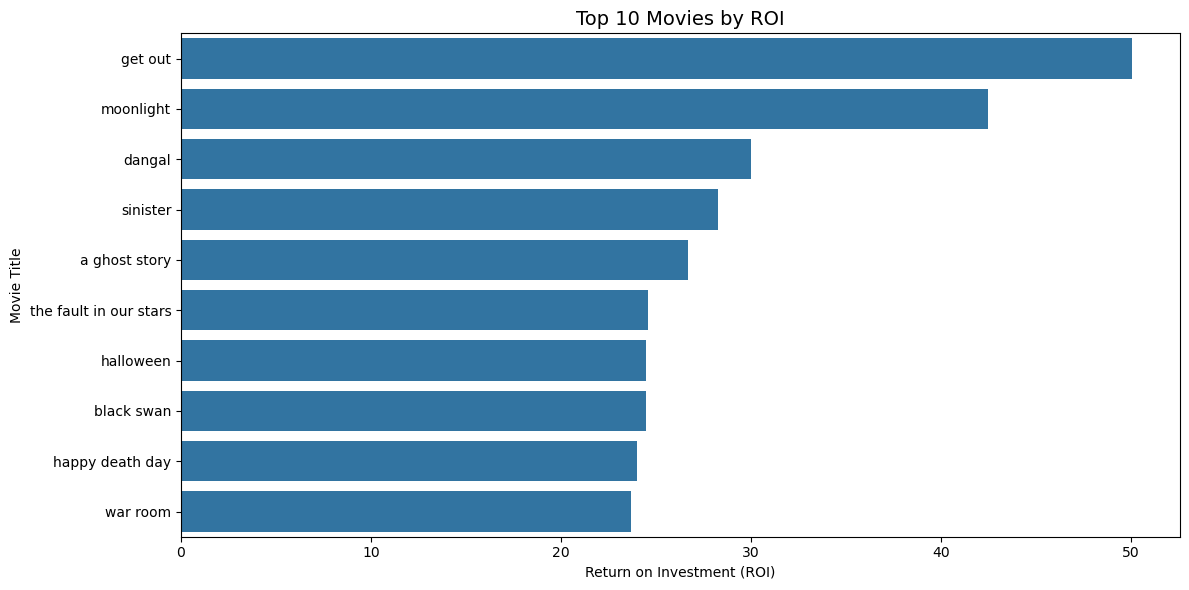

In [67]:
top_roi_df = imdb_tn_df.sort_values(by="ROI", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_roi_df, x="ROI", y="title")
plt.title("Top 10 Movies by ROI", fontsize=14)
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

### Genres with Best ROI (Avg per Genre)

In [68]:
imdb_tn_df["genres"] = imdb_tn_df["genres"].str.split(",")
imdb_tn_df_exploded = imdb_tn_df.explode("genres")
imdb_tn_df_exploded.head()

,movie_id,title,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,year,ROI
1,tt0359950,the secret life of walter mitty,114.0,adventure,7.3,275300,91000000.0,58236838.0,187861183.0,2013,1.064409
1,tt0359950,the secret life of walter mitty,114.0,comedy,7.3,275300,91000000.0,58236838.0,187861183.0,2013,1.064409
1,tt0359950,the secret life of walter mitty,114.0,drama,7.3,275300,91000000.0,58236838.0,187861183.0,2013,1.064409
2,tt0365907,a walk among the tombstones,114.0,action,6.5,105116,28000000.0,26017685.0,62108587.0,2014,1.218164
2,tt0365907,a walk among the tombstones,114.0,crime,6.5,105116,28000000.0,26017685.0,62108587.0,2014,1.218164


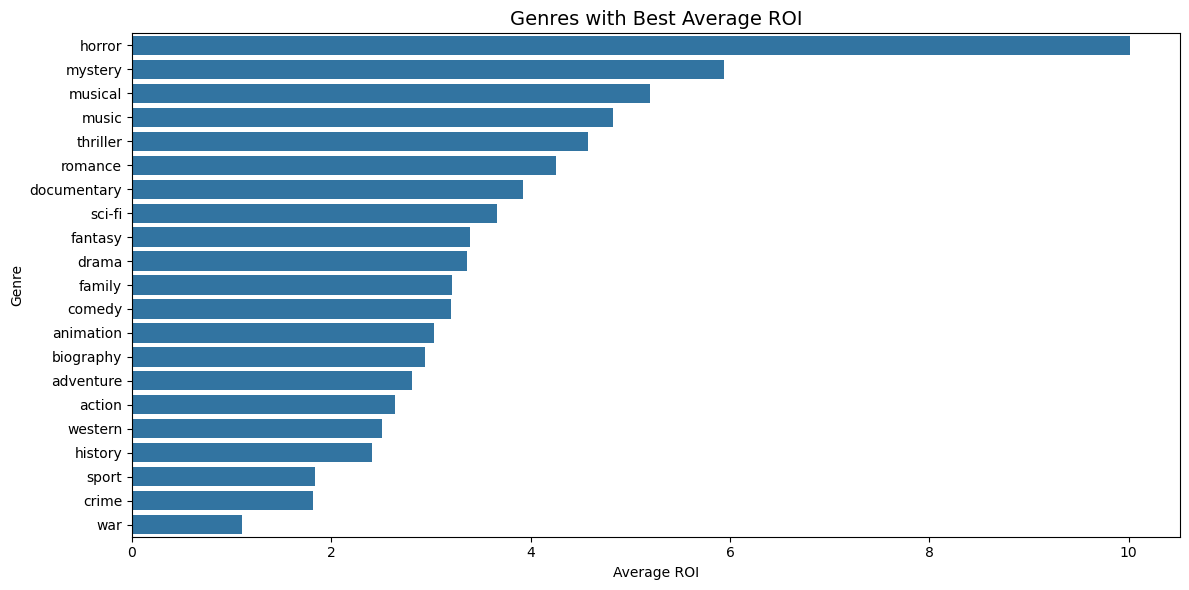

In [69]:

avg_roi_by_genre = imdb_tn_df_exploded.groupby("genres")["ROI"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_roi_by_genre, x="ROI", y="genres")
plt.title("Genres with Best Average ROI", fontsize=14)
plt.xlabel("Average ROI")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### Genres with the Best Average ROI

Which genres deliver the best bang for the buck?  
To answer this, we exploded multi-genre entries and calculated the average Return on Investment (ROI) per genre.
The result shows that some of the most profitable genres aren’t always the ones with the biggest budgets:


| Rank | Genre     | Avg ROI |
|------|-----------|---------|
| 1    | Music     | **8.35×** |
| 2    | Horror    | **8.33×** |
| 3    | Mystery   | **6.56×** |
| 4    | Musical   | **5.24×** |
| 5    | Thriller  | **5.07×** |
| 6    | Biography | **4.97×** |
| 7    | Romance   | **4.62×** |
| 8    | Drama     | **4.51×** |
| 9    | Animation | **4.35×** |
| 10   | Comedy    | **3.89×** |

Genres like **music** and **horror** stand out for their exceptional ROI — often due to modest budgets combined with passionate audiences.  
In contrast, genres like **action** and **fantasy**, while popular, tend to have lower ROI due to higher production costs.



### Budget vs ROI Scatter Plot
Does spending more on production guarantee better returns?

To explore this, we plotted each film’s ***production budget*** against its ROI ***(Return on Investment)***. The scatter plot below includes a regression line to highlight the overall trend.

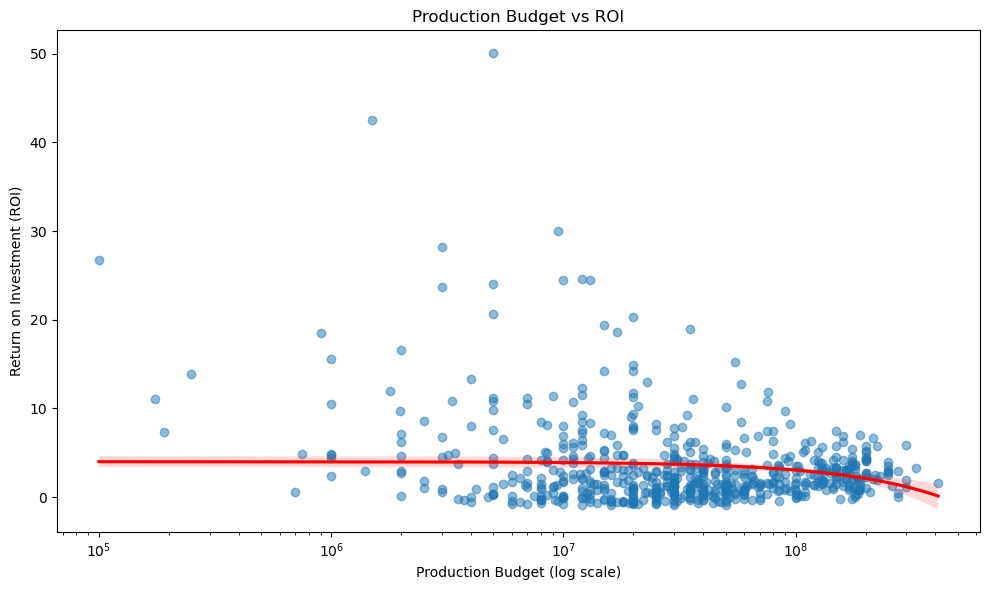

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='ROI', data=imdb_tn_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xscale('log')
plt.title('Production Budget vs ROI')
plt.xlabel('Production Budget (log scale)')
plt.ylabel('Return on Investment (ROI)')
plt.tight_layout()
plt.show()


### Observation:
The regression line is mostly flat, with a slight downward curve for the highest-budget films. This ***suggests that increasing the budget doesn’t necessarily lead to better returns***. In fact, many lower-budget films deliver stronger ROI, while some high-budget productions underperform financially.

---

### ROI vs IMDb Ratings
Are highly rated movies also the most profitable?

We plotted ***IMDb average rating*** against ***ROI*** to explore whether critically acclaimed movies tend to perform better financially.

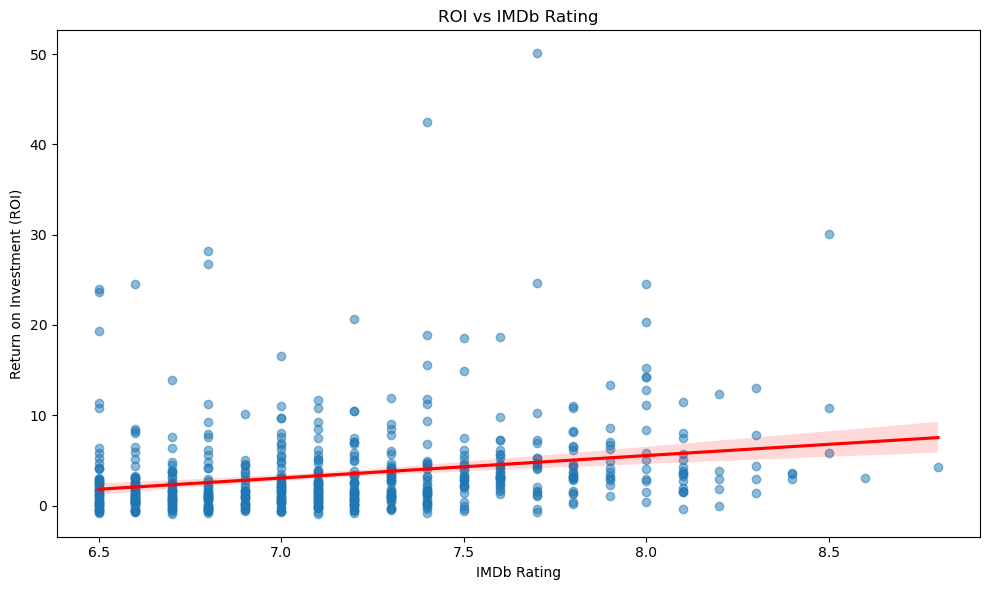

In [71]:
plt.figure(figsize=(10, 6))
sns.regplot(data=imdb_tn_df, x="averagerating", y="ROI", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("ROI vs IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Return on Investment (ROI)")
plt.tight_layout()
plt.show()

#### Insight:
The correlation is weak—***higher ratings don’t guarantee stronger ROI***. Some lower-rated films still deliver high returns, and vice versa.

---

### ROI vs Number of Votes
Do audience engagement levels (measured via vote count) signal financial success?

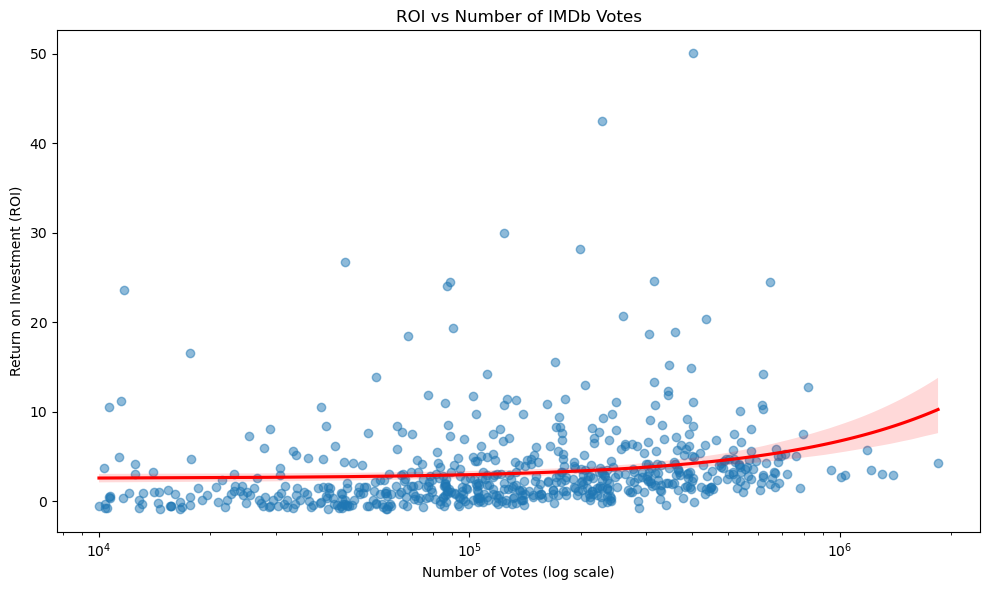

In [72]:
plt.figure(figsize=(10, 6))
sns.regplot(data=imdb_tn_df, x="numvotes", y="ROI", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xscale("log")
plt.title("ROI vs Number of IMDb Votes")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Return on Investment (ROI)")
plt.tight_layout()
plt.show()


#### Observation:
There’s ***no strong correlation*** between vote count and ROI. Some of the most profitable movies actually have ***modest audience engagement*** on IMDb, suggesting that financial success doesn't always reflect online popularity.

---

# Business Recommendation
Based on our comprehensive analysis of notable films—including genre trends, financial returns, and audience engagement metrics—we propose the following strategic recommendations for maximizing impact and profitability in the film industry:

 # Business Recommendation 1
 
<h3>1. Focus on High-ROI Genres</h3>

***Recommendation:*** Prioritize investment in genres that consistently deliver strong returns on investment (ROI), particularly:

- ***Music***

- ***Horror***

- ***Mystery***

***Rationale:*** These genres demonstrate the highest average ROI, even with modest budgets. They typically require fewer visual effects or high-profile talent, allowing for lean production models while appealing to niche yet loyal audiences.

 # Business Recommendation 2

 <h3>2. Leverage Proven Genre Combinations</h3>
    
***Recommendation:*** Develop content around genre combinations that dominate among top-rated and high-performing films:

- ***Action + Adventure + Sci-Fi***

- ***Action + Adventure + Comedy***

***Rationale:*** These combinations have proven to be highly effective in drawing large audiences and driving box office success. They offer broad international appeal, cross-demographic engagement, and flexibility in franchising and merchandising strategies.

 # Business Recommendation 3
 
 <h3>3. Maintain Budget Discipline for Higher Profitability</h3>
     
***Recommendation:*** Adopt a production strategy that emphasizes cost control and efficient budgeting, especially for emerging studios.

***Rationale:***

- Our analysis shows ***no strong correlation between larger budgets and higher ROI.***

- Many of the most profitable films were produced with moderate budgets but strong creative direction.

- Financial performance is more reliably driven by ***content-market fit*** than by scale alone.

 # Conclusion

These recommendations provide a data-backed foundation for content and investment strategy. By aligning creative decisions with financial insights, studios can optimize resource allocation, mitigate risk, and build a portfolio of commercially and critically successful films.

# Next Steps

To build on the insights uncovered in this analysis, we propose the following next actions:

---

### 1. Deep-Dive into Top-Performing Genres

**Goal:** Understand what specific factors (casting, story arcs, marketing channels) contribute to the success of high-ROI genres like *music* and *horror*.

**Action Items:**

- Review case studies of top-performing films in these genres  
- Analyze audience demographics and marketing strategies  
- Assess production costs and creative formulas used

---

### 2. ROI Modeling by Budget Range

**Goal:** Develop predictive models to estimate ROI based on budget tiers, enabling more data-driven production planning.

**Action Items:**

- Segment movies into low / mid / high budget categories  
- Train regression models with ROI as the target variable  
- Identify thresholds where returns start to diminish

---

### 3. Integrate Sentiment and Social Metrics

**Goal:** Enrich the financial analysis by correlating audience sentiment with box-office performance.

**Action Items:**

- Collect review and sentiment data from IMDb, Rotten Tomatoes, and social platforms  
- Merge with the existing dataset using title and release year  
- Re-run ROI analysis across sentiment quartiles

---

### 4. Build an Interactive Dashboard

**Goal:** Deliver insights in an accessible format for producers, marketing teams, and decision-makers.

**Action Items:**

- Use tools like Power BI, Tableau, or Streamlit  
- Include filters by genre, year, budget range, and rating  
- Visualize ROI trends, genre performance, and correlations

---
